# Abalone Sex Prediction & EDA (Machine Learning)

### Objective 
This repository aims to predict abalone's sex, give the information of its length, diameter, height, weights from different points, and rings. 

### Data availability
I use the Abalone dataset from UCI machine learning website: http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/

Data dictionary is available at: http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names


In [32]:
![Chart Image](AbalonePredition/Abalone1.jpg)

/bin/sh: -c: line 0: syntax error near unexpected token `('
/bin/sh: -c: line 0: `[Chart Image](AbalonePredition/Abalone1.jpg)'


# 1. Fetching Abalone Data

## 1.1 Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1.2 Reading data from web source

In [2]:
abalone_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
names =  ["Sex", "Length", "Diameter", "Height", 
          "Whole Weight", "Shucked Weight", "Viscera Weight", 
          "Shell Weight", "Rings"]
abalone_df = pd.read_csv(abalone_data, 
                         header=None, 
                         names = names)

In [3]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
#abalone_df['Sex'].replace('F', 0,inplace=True)
#abalone_df['Sex'].replace('M', 1,inplace=True)
#abalone_df['Sex'].replace('I', 2,inplace=True)
#abalone_df

# 2. EDA 

## 2.1 Pairplot Scatterplot by Gender

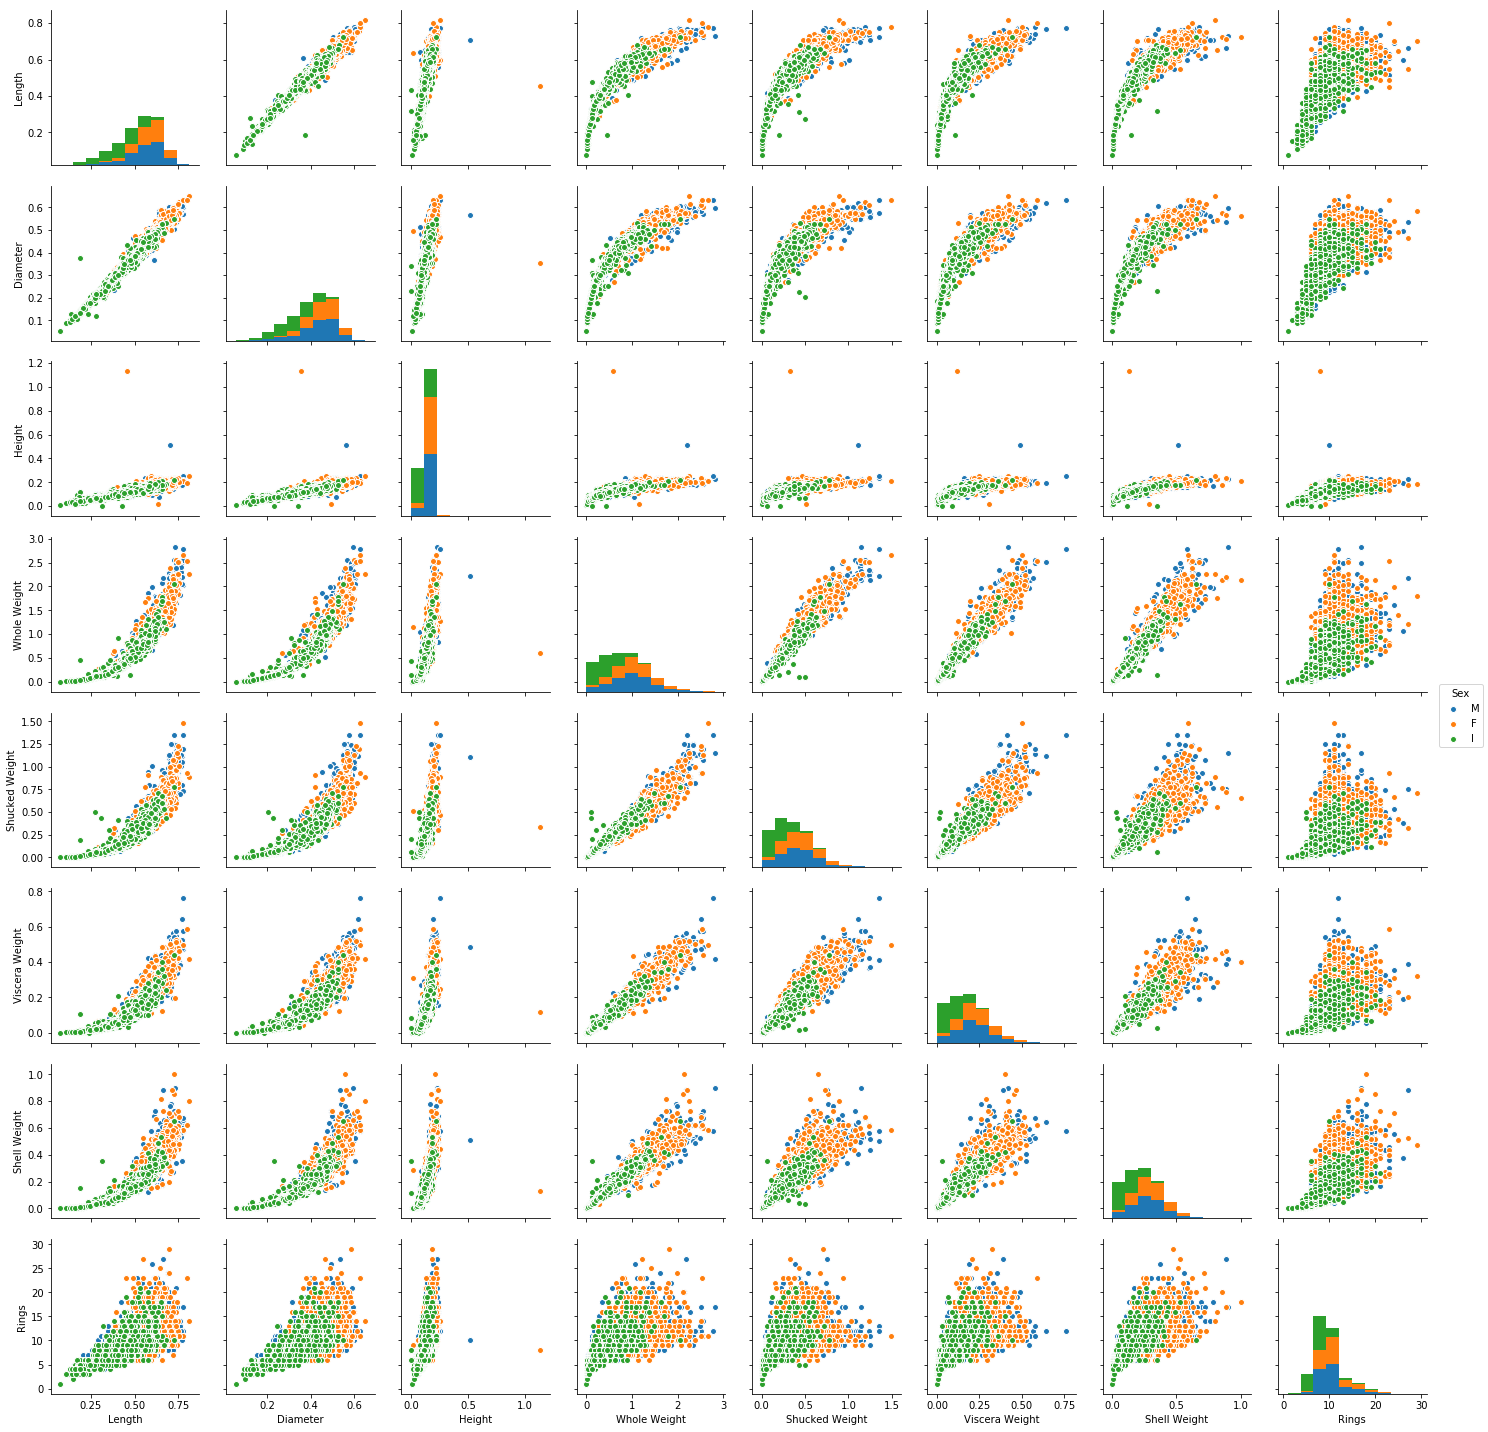

In [5]:
sns.pairplot(data = abalone_df, hue ="Sex")

## 2.2 Correlation Heatmap

In [6]:
corr = abalone_df.corr()
corr

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole Weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked Weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera Weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell Weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


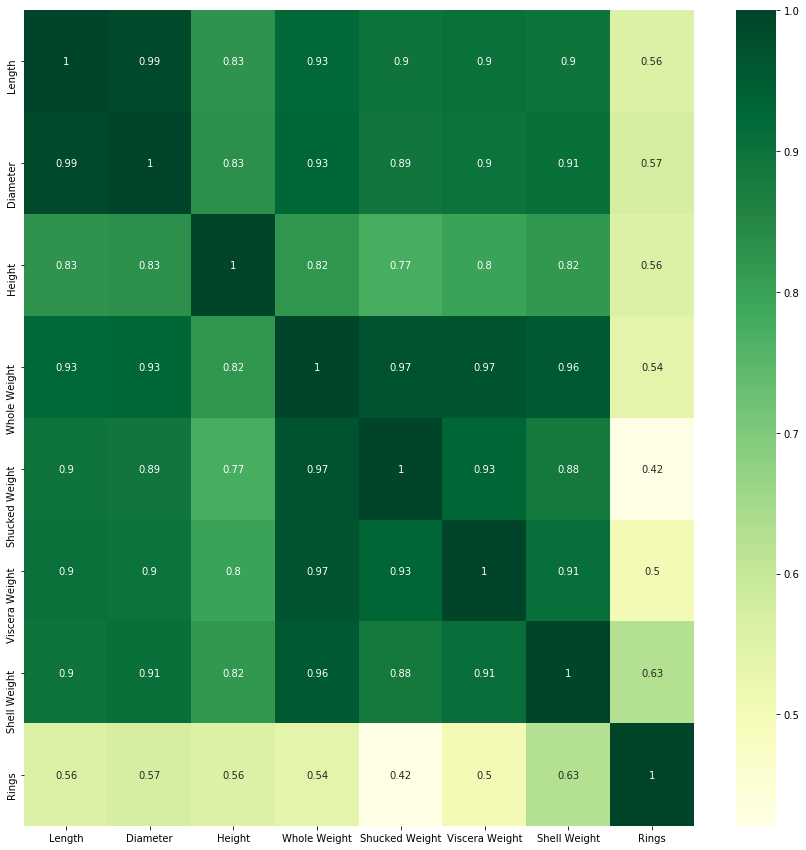

In [7]:
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap="YlGn")

##### Rings has relatively low correlation with other variables. To see how it is correlated with our predictive variale Sex, I draw a density plot below:

## 2.3 Rings Density plot by Sex

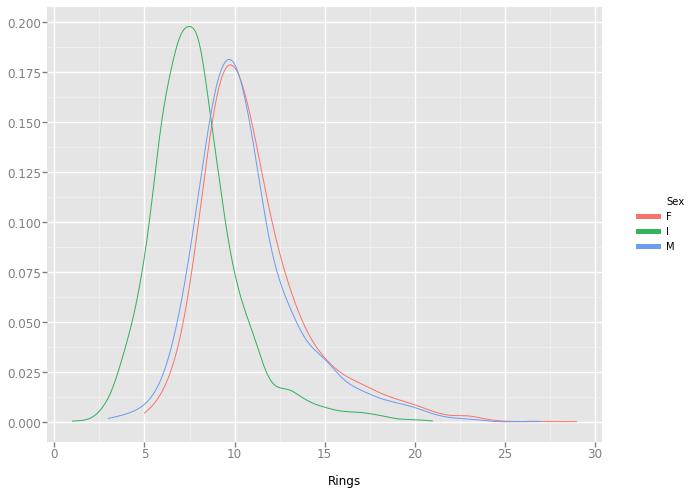

<ggplot: (7554426737)>

In [9]:
from ggplot import *
ggplot(abalone_df,aes(x="Rings", color = "Sex")) + geom_density(adjust = 1/6, position = "stack")

##### From density plot, we can clearly see that infant has lower rings than Female or Male, partly due to the reason that baby Abalone are not mature. 

##### Also, female's rings are slightly more than those for male.

In [24]:
# abalone_df["Sex"].unique()

### further explore if Rings is dependent on gender

,Sex,Rings
0,F,11.129304
1,I,7.890462
2,M,10.705497


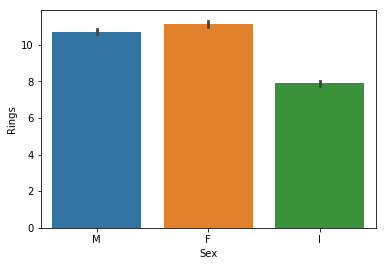

In [11]:
sns.barplot(x = "Sex", y = "Rings", data = abalone_df)
abalone_df[["Sex", "Rings"]].groupby(["Sex"], as_index = False).mean()

# 3. Machine Learning Classification Model for Sex

In [12]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.preprocessing import StandardScaler
#train,test=train_test_split(train_df,test_size=0.2,random_state=0,stratify=abalone_data['Sex'])

### Split left-hand side and right-hand side variables 

In [13]:
y = abalone_df["Sex"]
X = abalone_df.drop("Sex", axis=1)
X.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [14]:
y.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

### Split Data into Test and Training Set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## 3.1 Naive Bayes

In [16]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.510765550239


## 3.2 SVC model 

In [17]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.549043062201


## 3.3 Radical SVM Model 

In [18]:
svc_radical =svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(X_train,y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.549043062201


## 3.4 Logistic Regression

In [19]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.563397129187


## 3.5 Decision Tree Model

In [20]:
# Decision Tree Classifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
#y_pred = decisiontree.predict(X_test)
score_decisiontree = decisiontree.score(X_test,y_test)
print('The accuracy of the Decision Tree Model is', score_decisiontree)

The accuracy of the Decision Tree Model is 0.484449760766


## 3.6 Random Forest Model 

In [21]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.545454545455


## 3.7 KNN Model 

In [22]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)


The accuracy of the KNN Model is 0.544258373206


# 4. Cross Validation 

In [23]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Linear Svm','Radial Svm','Logistic Regression','Decision Tree','KNN','Random Forest']
models=[GaussianNB(), svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe


,CV Mean,Std
Naive Bayes,0.518322,0.072128
Linear Svm,0.541537,0.090347
Radial Svm,0.526229,0.081289
Logistic Regression,0.544890,0.088146
Decision Tree,0.474500,0.055325
KNN,0.523583,0.064854
Random Forest,0.534356,0.070530


#### It seems that logistic regression is a good model for Abalone dataset, since it gives the highest prediction score of 0.54489 outweighting other models. However, due to the limit of variables and number of records, if aiming to achieve higher score for prediction, we need to find other more representitive variables to anticipate the sex of Abalone in the future.